# Stochastic logistic model with environmental noise
In this notebook, it is presented a simulation of a stochastic logistic model with environmental noise. 
$$
\frac{dx(i)}{dt} = \left(x(i)\frac{(1 - \frac{x(i)}{K})}{\tau} + \sqrt{\frac{\sigma}{\tau}}\cdot x(i) \xi\right)
$$

The primary objectives are as follows:

    1) Simulate the stochastic logistic model with environmental noise as shown above, with Euler method
       The noise is given by a random sampling from a gaussian with mean o and standard deviation 10. It was also performed a mean over different realizations or trajectories;
       
    2) Check for Stationarity:
    Assess whether the system reaches a stationary state, and specifically, if this stationary state conforms to a gamma distribution.

    3) Compare with the Stationary Solution:
    Compare the results of the simulation with the stationary solution to understand how well the model aligns with the theoretical expectations.



### 1. Simulate stochastic logistic model with environmental noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [13]:
## Time parameters
dt = .001        # Time step.
T = 1.           # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

In [14]:
## Parameters of noise and K
sigma = 10  # Standard deviation.
mu = 0.    # Mean.
tau = .04  # Time constant.
K = 100    # coefficient
num_realizations = 5

In [15]:
# Simulation
x_list = []

## Euler-Maruyama method
for _ in range(num_realizations):
    x = np.zeros(n) #vector containing values of our process during the simulation
    x[0] = 10
    for i in range(0,n - 1):
        x[i + 1] = x[i] + dt * (x[i]*(1 - x[i]/K)/tau + x[i]*np.sqrt(sigma/tau)*np.random.randn()*sigma*np.sqrt(dt))
    x_list.append(x)

In [16]:
#average over realizations
x_avg = np.zeros(n)
for i in range(0,n):
    x_t = np.zeros(len(x_list)) # to store all the num_realizations-values of x at a fixed time
    for j in range(len(x_list)):
        x_t[j] = x_list[j][i]
    x_avg[i] = np.mean(x_t)     #average over realizations, at fixed time

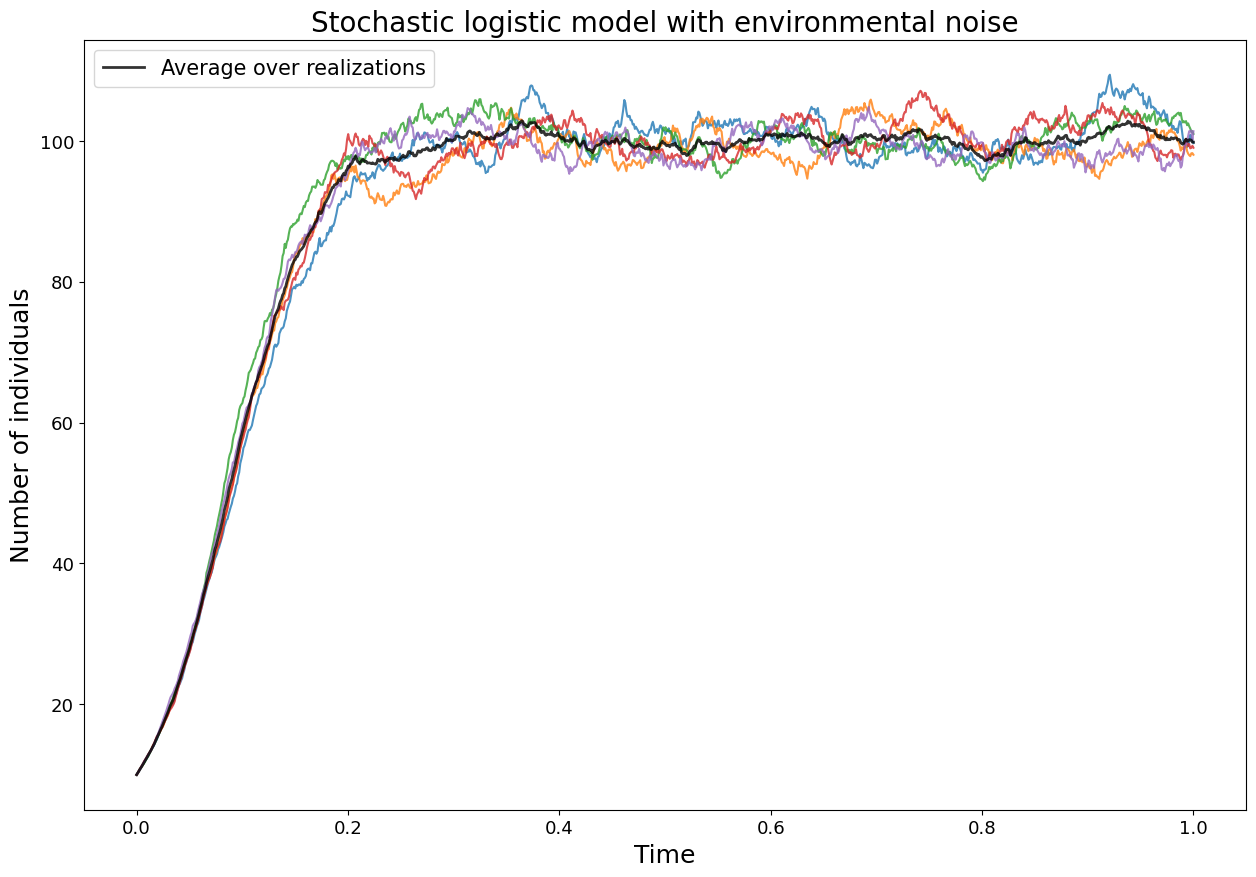

In [17]:
# Plot individual realizations with different colors
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for i in range(num_realizations):
    ax.plot(t, x_list[i], lw=1.5, alpha=0.8) 
ax.plot(t, x_avg, lw=2, alpha=0.8, color='black', label = 'Average over realizations')  

# Appearance of plot
ax.set_title('Stochastic logistic model with environmental noise', fontsize = 20) 
ax.set_xlabel('Time', fontsize = 18) 
ax.set_ylabel('Number of individuals', fontsize = 18) 
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=15)

### 2. Check if the stationary distribution is a Gamma distribution

In [18]:
#Extract the data at stationarity, cutting of the first 40% of data
xtot = [list(x_list[i][400:]) for i in range(num_realizations)]

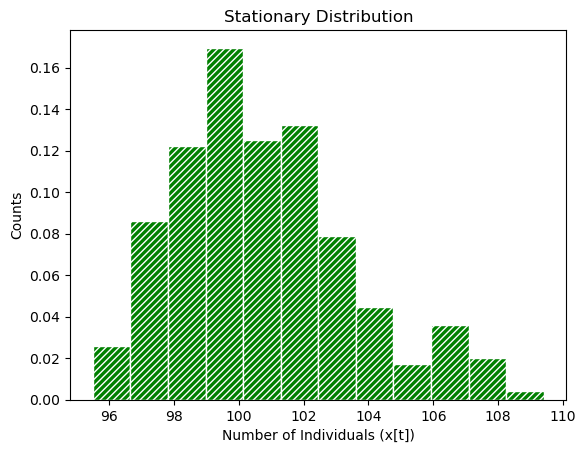

In [19]:
counts , bins, _ = plt.hist(xtot[0], bins=12, density = True, color='green', edgecolor='white', hatch='/////')
plt.title('Stationary Distribution')
plt.xlabel('Number of Individuals (x[t])')
plt.ylabel('Counts')

# Show the histogram
plt.show()


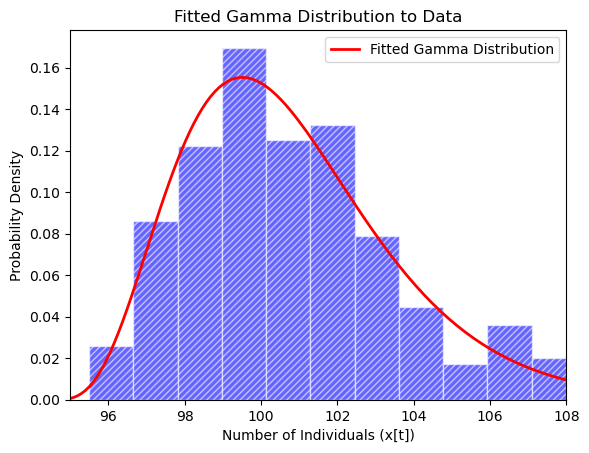

In [20]:
counts , bins, _ = plt.hist(xtot[0], bins=12, density=True, alpha=0.6, color='blue', edgecolor='white', hatch='/////')

# Plot the fitted gamma distribution
x = np.linspace(0, max(xtot[0]), 1000)
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(xtot[0])            # perform gamma fit
pdf = stats.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta) # reconstruct gamma function
plt.plot(x, pdf, 'r-', lw=2, label='Fitted Gamma Distribution')    # plot gamma 

# Set the title and labels
plt.title('Fitted Gamma Distribution to Data')
plt.xlabel('Number of Individuals (x[t])')
plt.ylabel('Probability Density')
plt.xlim(95,108)
plt.legend()

plt.show()

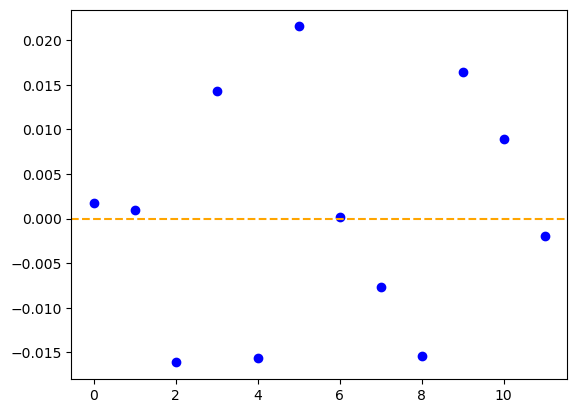

In [21]:
#Plot of the residuals to evaluate the goodness of the gamma fit
bin_centers = (bins[:-1] + bins[1:]) / 2
pdf_interpolated = np.interp(bin_centers, x, pdf) # calcola il punto di (x,pdf) in corrispondenza dei bin centers
residuals = counts - pdf_interpolated
plt.plot(residuals,'bo')
plt.axhline(y=0, color='orange', linestyle='--')

### 3 . Compare with stationary solution

In [22]:
#Define the stationary solution
Dw_t = np.random.randn()*sigma*np.sqrt(dt)
Dw_t = 0
x_stat = K + np.sqrt(dt) * K * sigma * np.sqrt(sigma / tau) * tau * Dw_t
x_stat

100.0

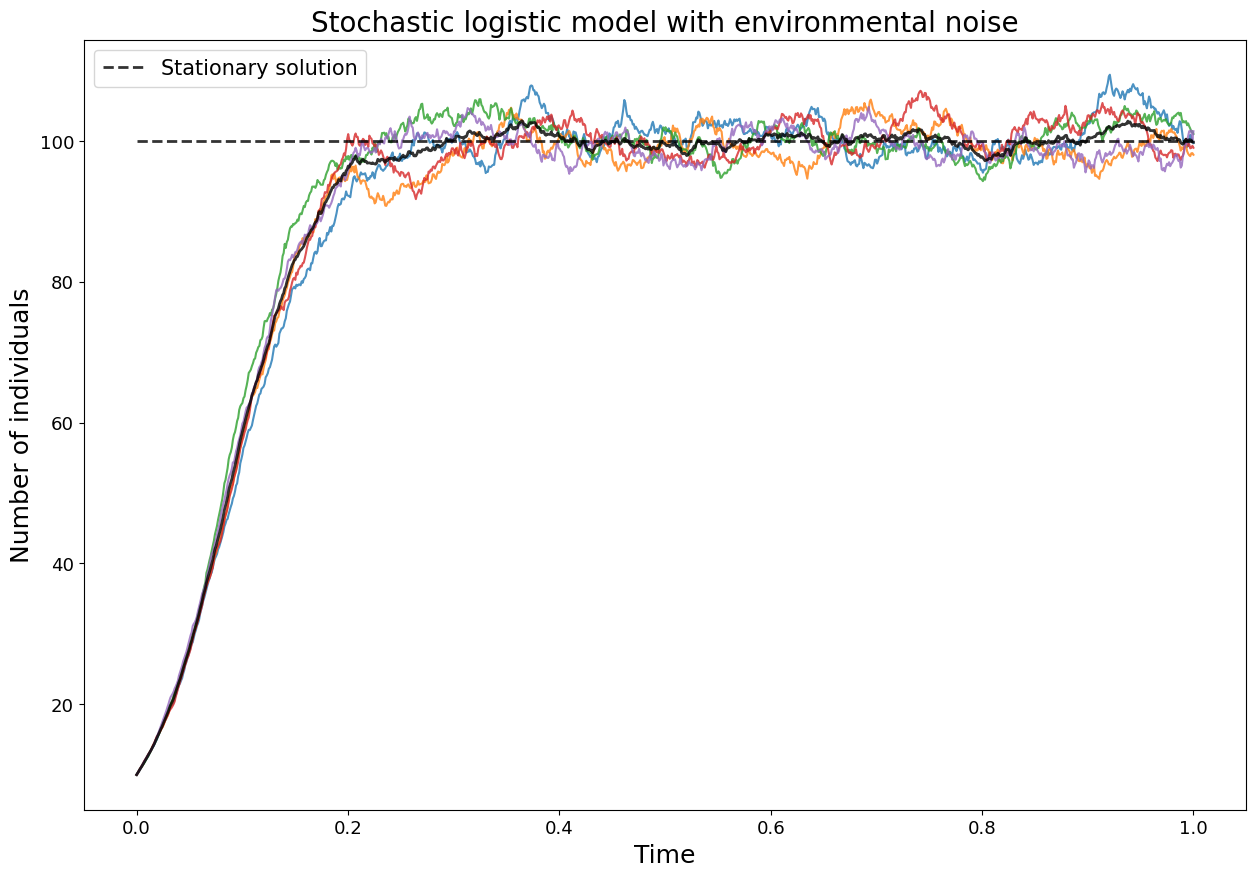

In [23]:
# Plot individual realizations with different colors + stationary solution 
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for i in range(num_realizations):
    ax.plot(t, x_list[i], lw=1.5, alpha=0.8) 
ax.plot(t, x_avg, lw=2, alpha=0.8, color='black') 
ax.plot(t, [x_stat] * n, lw=2, alpha=0.8, linestyle='dashed', color='black', label = 'Stationary solution')

#plot appearance
ax.set_title('Stochastic logistic model with environmental noise', fontsize = 20) 
ax.set_xlabel('Time', fontsize = 18) 
ax.set_ylabel('Number of individuals', fontsize = 18) 
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize = 15)